# **Install & Load Packages**

In [1]:
!pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.4 MB/s 


In [2]:
# numpy for array manipulation
import numpy as np
# pandas for dataframe manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt

#split training set and test set
from sklearn.model_selection import train_test_split
# import regression model
from sklearn.linear_model import LinearRegression
# import metrics module from scikit-learn
from sklearn import metrics
# import datetime
import datetime as dt

# load lifetimes plotting module
from lifetimes.plotting import *
# load lifetimes utils module
from lifetimes.utils import *
# load BetaGeoFitter model
from lifetimes import BetaGeoFitter
# load GammaGammaFitter
from lifetimes import GammaGammaFitter

# seaborn for preety data visualization
import seaborn as sns

# import datetime for date manipulation
import datetime as dt

import urllib
import json

import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# **Load Data**

In [3]:
data_customer = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_customers_dataset.csv", encoding="latin-1")

In [4]:
data_item = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_items_dataset.csv", encoding="latin-1")

In [5]:
data_payment = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_payments_dataset.csv", encoding="latin-1")

In [6]:
data_review = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_order_reviews_dataset.csv", encoding="latin-1")

In [7]:
data_order = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_orders_dataset.csv", encoding="latin-1")

In [8]:
data_product = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_products_dataset.csv", encoding="latin-1")

In [9]:
data_sellers = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/olist_sellers_dataset.csv", encoding="latin-1")

In [10]:
data_category = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/olist_ecommerce_data/product_category_name_translation.csv", encoding="latin-1")

# **Data Inspection**

Check first 10 first rows of our data

In [11]:
data_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [12]:
data_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [13]:
data_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [14]:
data_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [15]:
data_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [16]:
data_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [17]:
data_category

,ï»¿product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# JOIN TABLE

In [18]:
product1 = data_item.merge(data_product, on='product_id', how='inner')

In [19]:
product2 = product1.merge(data_payment, on='order_id', how='inner')

In [20]:
product3 = product2.merge(data_order, on='order_id', how='inner')

In [21]:
product4 = product3.merge(data_customer, on='customer_id', how='inner')

In [22]:
product5 = product4.merge(data_sellers, on='seller_id', how='inner')

In [23]:
df = pd.concat([product5, data_category], sort=False)

In [24]:
# reset index
df.reset_index(drop=True, inplace=True)

# **Data Inspection**

Check data structure

In [25]:
df.isnull().sum()

order_id                             71
order_item_id                        71
product_id                           71
seller_id                            71
shipping_limit_date                  71
price                                71
freight_value                        71
product_category_name              1769
product_name_lenght                1769
product_description_lenght         1769
product_photos_qty                 1769
product_weight_g                     91
product_length_cm                    91
product_height_cm                    91
product_width_cm                     91
payment_sequential                   71
payment_type                         71
payment_installments                 71
payment_value                        71
customer_id                          71
order_status                         71
order_purchase_timestamp             71
order_approved_at                    86
order_delivered_carrier_date       1316
order_delivered_customer_date      2638


In [26]:
percentage_missing = df.isnull().sum()/(df.shape[0])
misscol = list(percentage_missing[percentage_missing>0.6].index)

In [27]:
df.drop(columns=misscol, inplace = True)

In [28]:
df.isnull().sum()

order_id                           71
order_item_id                      71
product_id                         71
seller_id                          71
shipping_limit_date                71
price                              71
freight_value                      71
product_category_name            1769
product_name_lenght              1769
product_description_lenght       1769
product_photos_qty               1769
product_weight_g                   91
product_length_cm                  91
product_height_cm                  91
product_width_cm                   91
payment_sequential                 71
payment_type                       71
payment_installments               71
payment_value                      71
customer_id                        71
order_status                       71
order_purchase_timestamp           71
order_approved_at                  86
order_delivered_carrier_date     1316
order_delivered_customer_date    2638
order_estimated_delivery_date      71
customer_uni

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117672 entries, 0 to 117671
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   order_item_id                  117601 non-null  float64
 2   product_id                     117601 non-null  object 
 3   seller_id                      117601 non-null  object 
 4   shipping_limit_date            117601 non-null  object 
 5   price                          117601 non-null  float64
 6   freight_value                  117601 non-null  float64
 7   product_category_name          115903 non-null  object 
 8   product_name_lenght            115903 non-null  float64
 9   product_description_lenght     115903 non-null  float64
 10  product_photos_qty             115903 non-null  float64
 11  product_weight_g               117581 non-null  float64
 12  product_length_cm             

In [30]:
df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,27277.0,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800.0,jatai,GO,27277.0,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720.0,belo horizonte,MG,27277.0,volta redonda,SP


Since we have more than 1 product per order, we need to sum the price and the shipping value and get the maximum value of the shipping_limit_date for analysis.

# **Data Exploration**

In [31]:
# Count unique user for each country and pick the top 10
df.groupby(
  'customer_city', as_index=False
).customer_id.nunique().sort_values(
    by='customer_id', ascending = False
).head(10)

,customer_city,customer_id
3588,sao paulo,15402
3147,rio de janeiro,6834
452,belo horizonte,2750
557,brasilia,2116
1141,curitiba,1510
705,campinas,1429
2956,porto alegre,1372
3239,salvador,1238
1526,guarulhos,1178
3420,sao bernardo do campo,928


In the given dataset, we can observe most of the customers are from "Sao Paulo". So, we can filter data for sao paulo customer.

In [32]:
sp_data = df[df.customer_city == "sao paulo"]

total purchase value value can be calculated by sum of price and freight value

In [33]:
sp_data['total_order_value'] = sp_data['price'] + sp_data['freight_value']

In [34]:
sp_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,total_order_value
21,03054d8a8eefc2981cfad06f58e27979,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,cool_stuff,52.0,1170.0,...,2017-10-19 21:03:49,2017-10-25 00:00:00,d46eb9ba6d6b75c1dac85b91911fc9c2,3560.0,sao paulo,SP,27277.0,volta redonda,SP,74.06
27,e3aa3b61037e281dedb26da2882983ae,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-05-31 01:22:31,54.9,15.13,cool_stuff,52.0,1170.0,...,2017-06-02 08:51:41,2017-06-19 00:00:00,8b4f3f21f3fe735a4d85eded53ac5a9a,5012.0,sao paulo,SP,27277.0,volta redonda,SP,70.03
33,8e78a66489b3861f846342d4b158c8f4,1.0,2423252b2432f1803e4f29e0974c6cf7,48436dade18ac8b2bce089ec2a041202,2017-10-09 19:14:27,139.9,18.23,brinquedos,60.0,919.0,...,NaN,2017-10-26 00:00:00,30b7ce51d5b2beabc239e3fec9b3a57c,8257.0,sao paulo,SP,27277.0,volta redonda,SP,158.13
42,a45087c16cf11897252052baabb332c0,1.0,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-09-07 21:50:24,149.9,16.81,brinquedos,56.0,928.0,...,2017-09-11 19:45:46,2017-09-22 00:00:00,f672d4ae866d742fc72d3b4c4d2cf23d,4119.0,sao paulo,SP,27277.0,volta redonda,SP,166.71
59,4a580bca631a940ffc9e25c96da01773,1.0,c9ea06f7fd4bd778e96031f46f60dfb9,48436dade18ac8b2bce089ec2a041202,2017-08-07 20:10:17,95.9,16.43,brinquedos,56.0,670.0,...,2017-11-09 18:08:54,2017-08-23 00:00:00,0046311f458d8041b00063cb99482903,8270.0,sao paulo,SP,27277.0,volta redonda,SP,112.33


In [35]:
sp_data.isnull().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name            312
product_name_lenght              312
product_description_lenght       312
product_photos_qty               312
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  2
order_delivered_carrier_date     261
order_delivered_customer_date    425
order_estimated_delivery_date      0
customer_unique_id                 0
c

In [36]:
df_sp = sp_data.dropna()

In [37]:
df_sp = df_sp.reset_index(drop=True)

In [38]:
df_sp.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [39]:
df_sp.duplicated().sum()

0

In [40]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17868 entries, 0 to 17867
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       17868 non-null  object 
 1   order_item_id                  17868 non-null  float64
 2   product_id                     17868 non-null  object 
 3   seller_id                      17868 non-null  object 
 4   shipping_limit_date            17868 non-null  object 
 5   price                          17868 non-null  float64
 6   freight_value                  17868 non-null  float64
 7   product_category_name          17868 non-null  object 
 8   product_name_lenght            17868 non-null  float64
 9   product_description_lenght     17868 non-null  float64
 10  product_photos_qty             17868 non-null  float64
 11  product_weight_g               17868 non-null  float64
 12  product_length_cm              17868 non-null 

Check data summary using describe method

In [41]:
columns_timestamp = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_timestamp:
   df_sp[column] = pd.to_datetime(data_order[column])

In [42]:
df_sp.head(4)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,total_order_value
0,03054d8a8eefc2981cfad06f58e27979,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,cool_stuff,52.0,1170.0,...,2017-10-10 21:25:13,2017-10-18,d46eb9ba6d6b75c1dac85b91911fc9c2,3560.0,sao paulo,SP,27277.0,volta redonda,SP,74.06
1,e3aa3b61037e281dedb26da2882983ae,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-05-31 01:22:31,54.9,15.13,cool_stuff,52.0,1170.0,...,2018-08-07 15:27:45,2018-08-13,8b4f3f21f3fe735a4d85eded53ac5a9a,5012.0,sao paulo,SP,27277.0,volta redonda,SP,70.03
2,a45087c16cf11897252052baabb332c0,1.0,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-09-07 21:50:24,149.9,16.81,brinquedos,56.0,928.0,...,2018-08-17 18:06:29,2018-09-04,f672d4ae866d742fc72d3b4c4d2cf23d,4119.0,sao paulo,SP,27277.0,volta redonda,SP,166.71
3,4a580bca631a940ffc9e25c96da01773,1.0,c9ea06f7fd4bd778e96031f46f60dfb9,48436dade18ac8b2bce089ec2a041202,2017-08-07 20:10:17,95.9,16.43,brinquedos,56.0,670.0,...,2017-12-02 00:28:42,2017-12-15,0046311f458d8041b00063cb99482903,8270.0,sao paulo,SP,27277.0,volta redonda,SP,112.33


In [43]:
df_sp.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,seller_zip_code_prefix,total_order_value
count,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000
mean,1.229293,107.525796,14.346209,48.489534,768.494963,2.186423,1903.942075,29.837307,15.994236,22.891594,1.131408,2.561003,151.942766,4144.810611,22429.091504,121.872005
std,0.865228,162.840234,10.287839,10.125250,658.564073,1.735005,3593.493879,16.053892,13.142597,11.900478,1.059104,2.479405,217.403669,1754.254631,26608.630446,167.225281
min,1.000000,1.200000,0.000000,9.000000,4.000000,1.000000,0.000000,11.000000,2.000000,6.000000,1.000000,0.000000,0.010000,1003.000000,1001.000000,7.280000
25%,1.000000,35.000000,8.720000,42.000000,339.000000,1.000000,250.000000,18.000000,8.000000,15.000000,1.000000,1.000000,52.340000,3029.000000,5849.000000,46.660000
50%,1.000000,66.990000,12.480000,51.000000,580.000000,1.000000,600.000000,24.000000,12.000000,20.000000,1.000000,1.000000,94.760000,4158.000000,13403.000000,80.335000
75%,1.000000,119.900000,15.790000,57.000000,952.000000,3.000000,1600.000000,37.000000,20.000000,30.000000,1.000000,3.000000,167.752500,5083.000000,19025.000000,135.860000
max,21.000000,4399.870000,321.460000,72.000000,3992.000000,18.000000,30000.000000,105.000000,105.000000,118.000000,26.000000,23.000000,4513.320000,8490.000000,99500.000000,4513.320000


# **RFM Segmentation**

In [44]:
# select certain column
df_sp = df_sp[[
  "customer_id","price",
  "product_category_name","order_purchase_timestamp","order_id", 
  "total_order_value"
]]

Here, we are going to perform the following operations:

Calculate the number of days between the present date and the date of last purchase from each customer.
Calculate the number of orders for each customer.
Calculate sum of purchase price for each customer.

In [45]:
max_date = max(df_sp['order_purchase_timestamp']) + dt.timedelta(days=1)

In [46]:
df_sp_group = df_sp.groupby(
    'customer_id', as_index = False
).agg(
    {
      'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
      'order_id': lambda num: len(num),
      'product_category_name': lambda quant: quant.count(),
      'total_order_value': lambda total_order_value: total_order_value.sum()
    }
)

In [47]:
df_sp_group.head(3)

,customer_id,order_purchase_timestamp,order_id,product_category_name,total_order_value
0,000379cdec625522490c315e70c7a9fb,242,1,1,107.01
1,0005aefbb696d34b3424dccd0a0e9fd0,571,1,1,147.33
2,00062b33cb9f6fe976afdcff967ea74d,138,1,1,58.95


In [48]:
# Change the name of columns
df_sp_group.columns=['customer_id','num_days','num_transactions','num_units','spent_money']

In [49]:
df_sp_group.head(3)

,customer_id,num_days,num_transactions,num_units,spent_money
0,000379cdec625522490c315e70c7a9fb,242,1,1,107.01
1,0005aefbb696d34b3424dccd0a0e9fd0,571,1,1,147.33
2,00062b33cb9f6fe976afdcff967ea74d,138,1,1,58.95


In [50]:
#Rename columns
df_sp_group.rename(columns={'num_days': 'Recency',
                         'num_transactions': 'Frequency',
                         'spent_money': 'GMV'}, inplace=True)

In [55]:
# use only the necessary columns
rfm = df_sp_group[['customer_id', 'Recency', 'Frequency', 'GMV']]

In [57]:
# recency quartile segmentation
r_labels = range(4, 0, -1)
recency = rfm['Recency']
r_quartiles, bins = pd.qcut(recency, 4, labels=r_labels, retbins=True)
rfm = rfm.assign(R=r_quartiles.values)

In [58]:
# frequency quartile segmentation
f_labels = range(1, 5)
frequency = rfm['Frequency'].rank(method='first') # rank to deal with duplicate values
f_quartiles, bins = pd.qcut(frequency, 4, labels=f_labels, retbins=True)
rfm = rfm.assign(F = f_quartiles.values)

In [59]:
# monetary value quartile segmentation
m_labels = range(1, 5)
monetary = rfm['GMV']
m_quartiles, bins = pd.qcut(monetary, 4, labels=m_labels, retbins=True)
rfm = rfm.assign(M = m_quartiles.values)

To simplify the analysis, it is important that we combine the 3 different scores (R, F, and M) to create a single metric.

In [60]:
# show 5 samples of the newly created scores
rfm[['R', 'F', 'M']].sample(5)

,R,F,M
2397,2,1,1
12870,2,4,1
4915,3,4,4
12695,3,3,1
97,4,1,1


In [61]:
# Build RFM Segment and RFM Score
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['segment'] = rfm.apply(join_rfm, axis=1)
rfm['score'] = rfm[['R','F','M']].sum(axis=1)
# show 5 samples
rfm[['R', 'F', 'M', 'segment', 'score']].sample(5)

,R,F,M,segment,score
7432,1,2,1,121,4
1514,4,1,2,412,7
7641,2,2,2,222,6
105,4,1,4,414,9
3046,3,1,2,312,6


We can further divide the customers into RFM tiers by binning together ranges of scores. For example, we can say that customers with scores ranging from 3 to 5 are Bronze, from 5 to 9 are Silver and from 9 to 12 are Gold.

In [62]:
# group into different tiers
def get_tier(df):
    if df['score'] >= 9:
        return 'Gold'
    elif (df['score'] >= 5) and (df['score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
rfm['tier'] = rfm.apply(get_tier, axis=1)
rfm[['R', 'F', 'M', 'segment', 'score', 'tier']].sample(5)

,R,F,M,segment,score,tier
868,4,1,1,411,6,Silver
6888,4,2,1,421,7,Silver
3791,2,4,1,241,7,Silver
3161,2,1,3,213,6,Silver
11337,1,3,3,133,7,Silver


We can see that from the sample already taken are mostly Silver

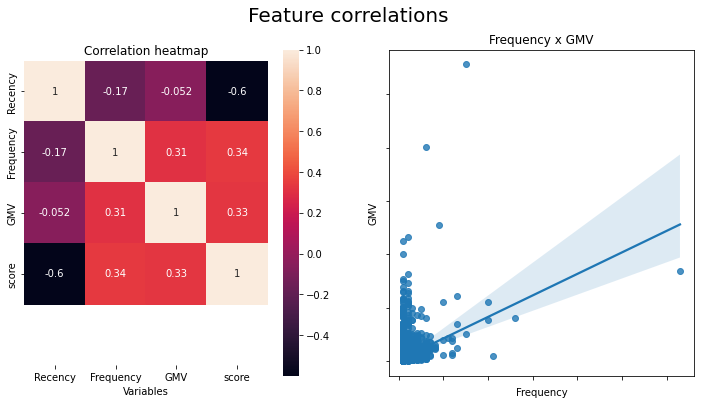

In [67]:
# build a feature correlation matrix
rfm_corr = rfm.corr()
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# create a heatmap to display the correlations
sns.heatmap(rfm_corr, annot=True, ax=ax[0], square=True)
ax[0].set_ylim([5, 0])
ax[0].set_title('Correlation heatmap')
ax[0].set_xlabel('Variables')
# plot the regrassion line to highlight the strong correlation
sns.regplot(rfm.Frequency, rfm.GMV, ax=ax[1])
ax[1].set_title('Frequency x GMV')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('GMV')
# Turn off tick labels
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
fig.suptitle('Feature correlations', fontsize=20)
plt.show()

As it's clear to see, GMV and frequency columns are very weakly correlated (with a coefficient of 0.31). You may think that this is kind of obvious in hindsight: customers who buy less often tend to spend less money in the long run

# **Calculate Profit Margin**

## Calculate Profit Margin
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 1% profit on the total sale.

In [70]:
# Profit Margin
df_sp_group['profit_margin'] = df_sp_group['GMV']*0.01

In [71]:
df_sp_group.head(3)

,customer_id,Recency,Frequency,num_units,GMV,profit_margin
0,000379cdec625522490c315e70c7a9fb,242,1,1,107.01,1.0701
1,0005aefbb696d34b3424dccd0a0e9fd0,571,1,1,147.33,1.4733
2,00062b33cb9f6fe976afdcff967ea74d,138,1,1,58.95,0.5895


# Calculate Purchase Frequency, Calculate Repeat Rate and Churn Rate

In [72]:
# purchase frequency
purchase_frequency = sum(df_sp_group['Frequency'])/df_sp_group.shape[0]

In [73]:
# Repeat Rate
repeat_rate = df_sp_group[df_sp_group.Frequency > 1].shape[0]/df_sp_group.shape[0]

In [74]:
#Churn Rate
churn_rate = 1-repeat_rate

In [75]:
print("purchase frequencies: {}".format(purchase_frequency))
print("repeat rate: {}".format(repeat_rate))
print("churn rate: {}".format(churn_rate))

purchase frequencies: 1.206400648166903
repeat rate: 0.1325366281817568
churn rate: 0.8674633718182432


# **Calcualte Customer Lifetime Value**

In [77]:
# Customer Value
df_sp_group['CLV']=(df_sp_group['GMV']*purchase_frequency)/churn_rate

In [78]:
#Customer Lifetime Value
df_sp_group['cust_lifetime_value']=df_sp_group['CLV']*df_sp_group['profit_margin']

In [79]:
df_sp_group.head()

,customer_id,Recency,Frequency,num_units,GMV,profit_margin,CLV,cust_lifetime_value
0,000379cdec625522490c315e70c7a9fb,242,1,1,107.01,1.0701,148.821192,159.253558
1,0005aefbb696d34b3424dccd0a0e9fd0,571,1,1,147.33,1.4733,204.895115,301.871973
2,00062b33cb9f6fe976afdcff967ea74d,138,1,1,58.95,0.5895,81.983079,48.329025
3,001028b78fd413e19704b3867c369d3a,300,1,1,37.61,0.3761,52.305065,19.671935
4,001051abfcfdbed9f87b4266213a5df1,78,3,3,195.60,1.9560,272.025280,532.081448


# Prediction Model for CLTV
Let's build the CLTV prediction model. 
Here, we are going to predict CLTV using Linear Regression Model.
Let's first use the data loaded and filtered above.

Calculate CLTV using following formula:
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

Customer Value = Average Order Value * Purchase Frequency

In [80]:
df_sp.head()

,customer_id,price,product_category_name,order_purchase_timestamp,order_id,total_order_value
0,9bd2f246e81c19f65c539ce426288ef5,58.9,cool_stuff,2017-10-02 10:56:33,03054d8a8eefc2981cfad06f58e27979,74.06
1,6d096f880bc145f805c6db79ea988789,54.9,cool_stuff,2018-07-24 20:41:37,e3aa3b61037e281dedb26da2882983ae,70.03
2,44c788d8ffa07a4963c9b8bd8017d151,149.9,brinquedos,2018-08-08 08:38:49,a45087c16cf11897252052baabb332c0,166.71
3,dbd8419d89e2d12f79322167e68e6225,95.9,brinquedos,2017-11-18 19:28:06,4a580bca631a940ffc9e25c96da01773,112.33
4,0f342c136ff07f922e5ee9e337096255,42.9,cool_stuff,2018-02-13 21:18:39,168c0ece9e82b97455bf1a81502af9de,59.01


Extract month and year from InvoiceDate.

In [81]:
df_sp['month_yr'] = df_sp['order_purchase_timestamp'].apply(
    lambda x: x.strftime('%b-%Y')
)

In [82]:
df_sp.head()

,customer_id,price,product_category_name,order_purchase_timestamp,order_id,total_order_value,month_yr
0,9bd2f246e81c19f65c539ce426288ef5,58.9,cool_stuff,2017-10-02 10:56:33,03054d8a8eefc2981cfad06f58e27979,74.06,Oct-2017
1,6d096f880bc145f805c6db79ea988789,54.9,cool_stuff,2018-07-24 20:41:37,e3aa3b61037e281dedb26da2882983ae,70.03,Jul-2018
2,44c788d8ffa07a4963c9b8bd8017d151,149.9,brinquedos,2018-08-08 08:38:49,a45087c16cf11897252052baabb332c0,166.71,Aug-2018
3,dbd8419d89e2d12f79322167e68e6225,95.9,brinquedos,2017-11-18 19:28:06,4a580bca631a940ffc9e25c96da01773,112.33,Nov-2017
4,0f342c136ff07f922e5ee9e337096255,42.9,cool_stuff,2018-02-13 21:18:39,168c0ece9e82b97455bf1a81502af9de,59.01,Feb-2018


In [85]:
sale = df_sp.pivot_table(
    index=['customer_id'],
    columns=['month_yr'],
    values='total_order_value',
    aggfunc='sum',
    fill_value=0
).reset_index()

In [86]:
sale.head()

month_yr,customer_id,Apr-2017,Apr-2018,Aug-2017,Aug-2018,Dec-2017,Feb-2017,Feb-2018,Jan-2017,Jan-2018,...,Mar-2017,Mar-2018,May-2017,May-2018,Nov-2017,Oct-2016,Oct-2017,Sep-2016,Sep-2017,Sep-2018
0,000379cdec625522490c315e70c7a9fb,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,107.01,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,0005aefbb696d34b3424dccd0a0e9fd0,0.0,0.0,0.0,0.0,0.0,147.33,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,00062b33cb9f6fe976afdcff967ea74d,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,58.95,0.00,0.0,0.0,0.0,0.0,0.0
3,001028b78fd413e19704b3867c369d3a,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,37.61,0.0,0.0,0.0,0.0,0.0
4,001051abfcfdbed9f87b4266213a5df1,0.0,0.0,65.2,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,65.2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


Let's sum all the months sales.

In [87]:
sale['CLV'] = sale.iloc[:,2:].sum(axis=1)

In [168]:
sale.head()

month_yr,customer_id,Apr-2017,Apr-2018,Aug-2017,Aug-2018,Dec-2017,Feb-2017,Feb-2018,Jan-2017,Jan-2018,...,Mar-2018,May-2017,May-2018,Nov-2017,Oct-2016,Oct-2017,Sep-2016,Sep-2017,Sep-2018,CLV
0,000379cdec625522490c315e70c7a9fb,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,107.01,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,107.01
1,0005aefbb696d34b3424dccd0a0e9fd0,0.0,0.0,0.0,0.0,0.0,147.33,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,147.33
2,00062b33cb9f6fe976afdcff967ea74d,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,58.95,0.00,0.0,0.0,0.0,0.0,0.0,58.95
3,001028b78fd413e19704b3867c369d3a,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,37.61,0.0,0.0,0.0,0.0,0.0,37.61
4,001051abfcfdbed9f87b4266213a5df1,0.0,0.0,65.2,0.0,0.0,0.00,0.0,0.0,0.00,...,65.2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,195.60


In [91]:
X=sale[['Apr-2017','May-2017','Jun-2017','Jul-2017','Aug-2017','Sep-2017']]
y=sale[['CLV']]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    random_state=42
)

In [93]:
df_sp['order_purchase_timestamp'] = df_sp['order_purchase_timestamp'].dt.date

In [117]:
df_sp.head()

,customer_id,price,product_category_name,Time,order_id,total_order_value,month_yr
0,9bd2f246e81c19f65c539ce426288ef5,58.9,cool_stuff,2017-10-02,03054d8a8eefc2981cfad06f58e27979,74.06,Oct-2017
1,6d096f880bc145f805c6db79ea988789,54.9,cool_stuff,2018-07-24,e3aa3b61037e281dedb26da2882983ae,70.03,Jul-2018
2,44c788d8ffa07a4963c9b8bd8017d151,149.9,brinquedos,2018-08-08,a45087c16cf11897252052baabb332c0,166.71,Aug-2018
3,dbd8419d89e2d12f79322167e68e6225,95.9,brinquedos,2017-11-18,4a580bca631a940ffc9e25c96da01773,112.33,Nov-2017
4,0f342c136ff07f922e5ee9e337096255,42.9,cool_stuff,2018-02-13,168c0ece9e82b97455bf1a81502af9de,59.01,Feb-2018


In [118]:
# select certain column
df_sp = df_sp[[
  "customer_id","price","Time"]]

In [119]:
df_sp.rename(columns={'price': 'Sales'}, inplace=True)

In [120]:
# only pick data with no null data
df_sp  = df_sp[pd.notnull(df_sp['customer_id'])]

In [121]:
df_sp.head()

,customer_id,Sales,Time
0,9bd2f246e81c19f65c539ce426288ef5,58.9,2017-10-02
1,6d096f880bc145f805c6db79ea988789,54.9,2018-07-24
2,44c788d8ffa07a4963c9b8bd8017d151,149.9,2018-08-08
3,dbd8419d89e2d12f79322167e68e6225,95.9,2017-11-18
4,0f342c136ff07f922e5ee9e337096255,42.9,2018-02-13


Count number of unique users

In [122]:
df_sp['customer_id'].nunique()

14811

In [123]:
df = summary_data_from_transaction_data(
    df_sp, 
    'customer_id', 
    'Time', 
    monetary_value_col='Sales', 
    observation_period_end='2018-12-9'
)

In [125]:
df.head()

,frequency,recency,T,monetary_value
customer_id,,,,
000379cdec625522490c315e70c7a9fb,0.0,0.0,322.0,0.00
0005aefbb696d34b3424dccd0a0e9fd0,0.0,0.0,651.0,0.00
00062b33cb9f6fe976afdcff967ea74d,0.0,0.0,217.0,0.00
001028b78fd413e19704b3867c369d3a,0.0,0.0,379.0,0.00
001051abfcfdbed9f87b4266213a5df1,2.0,320.0,478.0,49.97


There are 14811 customers under our analysis. CustomerID 000379cdec625522490c315e70c7a9fb made 1 purchase only (no repeat), so the frequency and recency are 0, and the age is 322 days (e.g. the duration between the first purchase and the end of the period in the analysis).

Text(0.5, 1.0, 'Frequency')

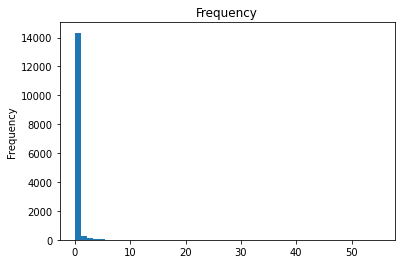

In [126]:
df['frequency'].plot(kind='hist', bins=50)
plt.title('Frequency')

Distribution data frequency in range 0 - 5

In [127]:
print(df['frequency'].describe())

count    14811.000000
mean         0.204915
std          0.873385
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.000000
Name: frequency, dtype: float64


In [129]:
print(sum(df['frequency'] == 0)*100/float(len(df_sp)))

71.93306469666443


Check summary and distribution of recency

Text(0.5, 1.0, 'Recency')

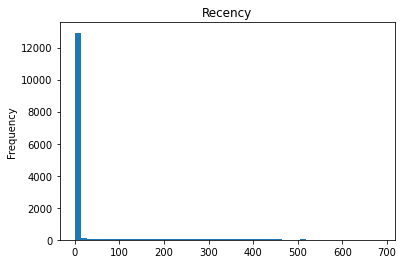

In [130]:
df['recency'].plot(kind='hist', bins=50)
plt.title('Recency')

Distribution data of Recency is about 0 - 450 and mostly in 0 for high frequency

In [131]:
print(df['recency'].describe())

count    14811.000000
mean        27.998920
std         89.301563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        683.000000
Name: recency, dtype: float64


In [132]:
print(sum(df['recency'] == 0) * 100/float(len(df_sp)))

71.93306469666443


In [133]:
df = df.query('frequency > 0')

In [134]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df['frequency'], df['recency'], df['T'])

<lifetimes.BetaGeoFitter: fitted with 1958 subjects, a: 0.79, alpha: 1318.11, b: 0.38, r: 8.59>

In [135]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,8.591915,1.178365,6.282320,10.901510
alpha,1318.107941,189.888412,945.926654,1690.289229
a,0.793723,0.112120,0.573967,1.013478
b,0.384423,0.060570,0.265706,0.503140


Period 7 Day

In [148]:
# pick period
t = 7
# predict purchases
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df['frequency'], df['recency'], df['T']
)

In [137]:
df['prob_alive'] = bgf.conditional_probability_alive(
    df['frequency'], df['recency'], df['T']
)

In [138]:
df.sort_values(by='predicted_purchases', ascending = True).head(10)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_id,,,,,,
c0186800fe9bb6579c73f2b2345cce4c,1.0,20.0,689.0,29.00,0.000326,0.009816
b5da2b9eed5cdc1ee96bb8ae16e0e19c,1.0,3.0,632.0,77.90,0.000391,0.011428
18a0e3a650bfc5f55df2c50a0af08378,1.0,10.0,639.0,39.00,0.000396,0.011614
10595804cffb2dbf2c9dacca0008817b,1.0,39.0,668.0,129.99,0.000416,0.012397
a836f6725983cd79994904405fc070aa,1.0,3.0,612.0,15.75,0.000435,0.012601
dbb68cef9a37ab412a671c35ef258d33,1.0,19.0,629.0,99.90,0.000445,0.012997
167510ce303457c530c3766d431b9e35,1.0,40.0,653.0,110.32,0.000454,0.013413
1765717276473594d6231f90c621ea9d,1.0,47.0,660.0,30.50,0.000459,0.013617
8f883e53bf1f50f31bc9e2f4fb8c980d,1.0,54.0,661.0,59.00,0.000479,0.014224


In [139]:
df.query('predicted_purchases > 0.5')

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_id,,,,,,


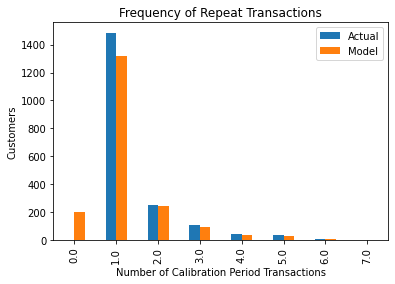

In [151]:
plot_period_transactions(bgf, max_frequency=7)

We can see that data actual and prediction just have same in 2 period, and mostly underqualified from actual

Period 14 Day

In [140]:
# pick period
t = 14
# predict purchases
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df['frequency'], df['recency'], df['T']
)

In [141]:
df['prob_alive'] = bgf.conditional_probability_alive(
    df['frequency'], df['recency'], df['T']
)

In [142]:
df.sort_values(by='predicted_purchases', ascending = True).head(10)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_id,,,,,,
c0186800fe9bb6579c73f2b2345cce4c,1.0,20.0,689.0,29.00,0.000648,0.009816
b5da2b9eed5cdc1ee96bb8ae16e0e19c,1.0,3.0,632.0,77.90,0.000776,0.011428
18a0e3a650bfc5f55df2c50a0af08378,1.0,10.0,639.0,39.00,0.000786,0.011614
10595804cffb2dbf2c9dacca0008817b,1.0,39.0,668.0,129.99,0.000827,0.012397
a836f6725983cd79994904405fc070aa,1.0,3.0,612.0,15.75,0.000865,0.012601
dbb68cef9a37ab412a671c35ef258d33,1.0,19.0,629.0,99.90,0.000884,0.012997
167510ce303457c530c3766d431b9e35,1.0,40.0,653.0,110.32,0.000901,0.013413
1765717276473594d6231f90c621ea9d,1.0,47.0,660.0,30.50,0.000912,0.013617
8f883e53bf1f50f31bc9e2f4fb8c980d,1.0,54.0,661.0,59.00,0.000952,0.014224


In [143]:
df.query('predicted_purchases > 0.5')

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_id,,,,,,


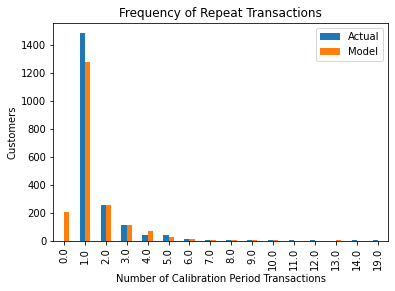

In [152]:
plot_period_transactions(bgf, max_frequency=14)

We can see that data actual and prediction just have same in 2 period, and mostly underqualified from actual

Period 30 Day

In [144]:
# pick period
t = 30
# predict purchases
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df['frequency'], df['recency'], df['T']
)

In [145]:
df['prob_alive'] = bgf.conditional_probability_alive(
    df['frequency'], df['recency'], df['T']
)

In [146]:
df.sort_values(by='predicted_purchases', ascending = True).head(10)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_id,,,,,,
c0186800fe9bb6579c73f2b2345cce4c,1.0,20.0,689.0,29.00,0.001368,0.009816
b5da2b9eed5cdc1ee96bb8ae16e0e19c,1.0,3.0,632.0,77.90,0.001638,0.011428
18a0e3a650bfc5f55df2c50a0af08378,1.0,10.0,639.0,39.00,0.001659,0.011614
10595804cffb2dbf2c9dacca0008817b,1.0,39.0,668.0,129.99,0.001746,0.012397
a836f6725983cd79994904405fc070aa,1.0,3.0,612.0,15.75,0.001824,0.012601
dbb68cef9a37ab412a671c35ef258d33,1.0,19.0,629.0,99.90,0.001865,0.012997
167510ce303457c530c3766d431b9e35,1.0,40.0,653.0,110.32,0.001902,0.013413
1765717276473594d6231f90c621ea9d,1.0,47.0,660.0,30.50,0.001925,0.013617
8f883e53bf1f50f31bc9e2f4fb8c980d,1.0,54.0,661.0,59.00,0.002010,0.014224


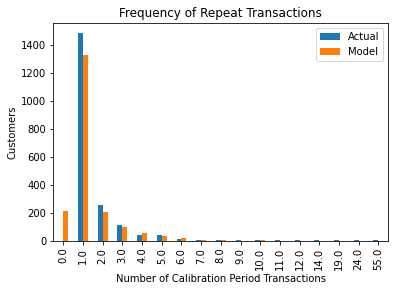

In [153]:
plot_period_transactions(bgf, max_frequency=30)

We can see that data actual and prediction just have same in 2 period, and mostly underqualified from actual. moreover in one time of customer transaction, the model is far below actual

Period 60 Day

In [154]:
# pick period
t = 60
# predict purchases
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, df['frequency'], df['recency'], df['T']
)

In [155]:
df['prob_alive'] = bgf.conditional_probability_alive(
    df['frequency'], df['recency'], df['T']
)

In [156]:
df.sort_values(by='predicted_purchases', ascending = True).head(10)

,frequency,recency,T,monetary_value,predicted_purchases,prob_alive
customer_id,,,,,,
c0186800fe9bb6579c73f2b2345cce4c,1.0,20.0,689.0,29.00,0.002662,0.009816
b5da2b9eed5cdc1ee96bb8ae16e0e19c,1.0,3.0,632.0,77.90,0.003185,0.011428
18a0e3a650bfc5f55df2c50a0af08378,1.0,10.0,639.0,39.00,0.003226,0.011614
10595804cffb2dbf2c9dacca0008817b,1.0,39.0,668.0,129.99,0.003396,0.012397
a836f6725983cd79994904405fc070aa,1.0,3.0,612.0,15.75,0.003546,0.012601
dbb68cef9a37ab412a671c35ef258d33,1.0,19.0,629.0,99.90,0.003627,0.012997
167510ce303457c530c3766d431b9e35,1.0,40.0,653.0,110.32,0.003701,0.013413
1765717276473594d6231f90c621ea9d,1.0,47.0,660.0,30.50,0.003744,0.013617
8f883e53bf1f50f31bc9e2f4fb8c980d,1.0,54.0,661.0,59.00,0.003909,0.014224


# **Estimating customer lifetime value using gamma-gamma model of monetary value**

In [157]:
summary = df[df['frequency']>0]
print(summary.head())
print()
print('\nCustomers with atleast 1 repeat purchase\n', len(summary))

                                  frequency  recency      T  monetary_value  \
customer_id                                                                   
001051abfcfdbed9f87b4266213a5df1        2.0    320.0  478.0           49.97   
002f90a6eb386bc43bc9ba200db31a89        1.0    141.0  556.0           64.90   
00426311a53f3c052943c88b692a3be2        5.0    364.0  493.0           29.50   
004440537b68545ca3c341d7279bc4c0        1.0    142.0  356.0           39.99   
005596395ca3acd0433fe7d6f95a028e        1.0    113.0  272.0           15.90   

                                  predicted_purchases  prob_alive  
customer_id                                                        
001051abfcfdbed9f87b4266213a5df1             0.133980    0.396756  
002f90a6eb386bc43bc9ba200db31a89             0.012168    0.042051  
00426311a53f3c052943c88b692a3be2             0.292377    0.669242  
004440537b68545ca3c341d7279bc4c0             0.037122    0.115385  
005596395ca3acd0433fe7d6f95a028e      

In [158]:
summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,-0.013379
frequency,-0.013379,1.000000


In [159]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(summary['frequency'],
        summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 1958 subjects, p: 6.00, q: 1.79, v: 13.16>


In [160]:
print(ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).head(10))

customer_id
001051abfcfdbed9f87b4266213a5df1     53.061258
002f90a6eb386bc43bc9ba200db31a89     68.987320
00426311a53f3c052943c88b692a3be2     31.308842
004440537b68545ca3c341d7279bc4c0     46.973417
005596395ca3acd0433fe7d6f95a028e     25.684179
007b18ac9b8a627f259ea78aed981315     36.289030
00a6e2753fc2652cb87386ffbf5792b2     82.685253
00a7f9b60493b4b11601b42e5f31eac9     53.345165
00e13fc0014cb95fde8d8eb1d3d84195    116.709149
00e7c7983371f6e0c6ce890040d431db     89.224911
dtype: float64


In [161]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).mean(),
    summary[summary['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 89.0603762598055, Average profit: 88.01202588140825


In [162]:
# refit the BG model to the summary_with_money_value dataset 
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(ggf.customer_lifetime_value( 
    bgf, #the model to use to predict the number of future transactions 
    summary['frequency'], 
    summary['recency'], 
    summary['T'], 
    summary['monetary_value'], time=12, # months 
    discount_rate=0.1 # monthly discount rate ~ 12.5% annually 
).head(10)) 

customer_id
001051abfcfdbed9f87b4266213a5df1    20.827404
002f90a6eb386bc43bc9ba200db31a89     2.367993
00426311a53f3c052943c88b692a3be2    28.161741
004440537b68545ca3c341d7279bc4c0     4.834920
005596395ca3acd0433fe7d6f95a028e     3.573768
007b18ac9b8a627f259ea78aed981315     3.974580
00a6e2753fc2652cb87386ffbf5792b2     7.884028
00a7f9b60493b4b11601b42e5f31eac9     4.338982
00e13fc0014cb95fde8d8eb1d3d84195    19.976545
00e7c7983371f6e0c6ce890040d431db    12.553631
Name: clv, dtype: float64


Segmentation calculation:
The calculation to know which segmentation the customer is in is given by averaging the F and M scores and the separate R value.

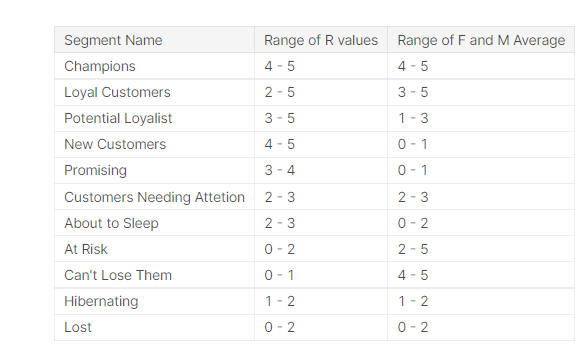

[source](https://www.kaggle.com/code/ceruttivini/rfm-segmentation-and-customer-analysis/notebook)

In [169]:
# Summary metrics per RFM Score
score_summary = rfm.groupby('score').agg(
    mean_recency=('Recency', 'mean'),
    std_recency=('Recency', 'std'),
    mean_frequency=('Frequency', 'mean'),
    std_frequency=('Frequency', 'std'),
    mean_monetary=('GMV', 'mean'),
    std_monetary=('GMV', 'std'),   
    samples=('customer_id', lambda x: len(x)*100/len(rfm.score))
).round(2)
# Get the 10 segments with most customers
popular_segments = rfm.segment.value_counts()[:10].index.tolist()
# Summary metrics for the 10 most popular RFM Segments
segment_summary = rfm[rfm.segment.isin(popular_segments)].groupby('segment').agg(
    mean_recency=('Recency', 'mean'),
    std_recency=('Recency', 'std'),
    mean_frequency=('Frequency', 'mean'),
    std_frequency=('Frequency', 'std'),
    mean_monetary=('GMV', 'mean'),
    std_monetary=('GMV', 'std'),   
    samples=('customer_id', lambda x: len(x)*100/len(rfm.score))
).round(2)
# Summary metrics per RFM Tier
tier_summary = rfm.groupby('tier').agg(
    mean_recency=('Recency', 'mean'),
    std_recency=('Recency', 'std'),
    mean_frequency=('Frequency', 'mean'),
    std_frequency=('Frequency', 'std'),
    mean_monetary=('GMV', 'mean'),
    std_monetary=('GMV', 'std'),   
    samples_percentage=('customer_id', lambda x: len(x)*100/len(rfm.score))
).round(2)

In [174]:
print("score summary: {}".format(score_summary))
print("popular segments: {}".format(popular_segments))
print("segment summary: {}".format(segment_summary))
print("tier summary: {}".format(tier_summary))

score summary:        mean_recency  std_recency  mean_frequency  std_frequency  \
score                                                             
3            471.01        77.05            1.00           0.00   
4            409.27       104.10            1.00           0.00   
5            361.87       125.46            1.00           0.00   
6            310.28       143.85            1.00           0.06   
7            264.07       139.61            1.02           0.13   
8            223.71       134.11            1.06           0.25   
9            181.86       116.59            1.19           0.47   
10           147.43        84.50            1.44           0.73   
11           117.00        59.56            1.89           1.00   
12            69.61        30.10            3.03           3.63   

       mean_monetary  std_monetary  samples  
score                                        
3              35.80          9.49     2.12  
4              47.62         19.35     5.6

In [163]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [165]:
rfm['segment'] = rfm.apply(get_segment,axis=1)

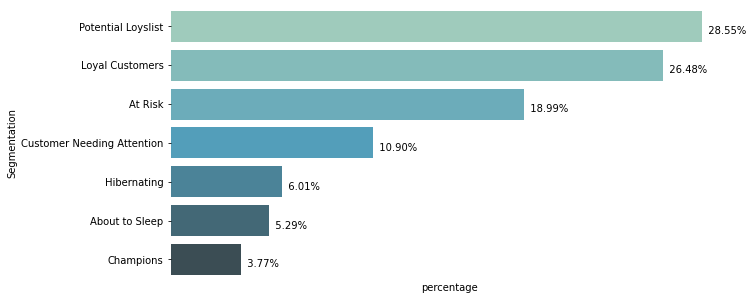

In [167]:
plt.figure(figsize=(10,5))
percentage = (rfm['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
plt.show()

Conclusion:

28.55% - Potential Loyslist:

These are recent buyers, spend a good amount and have bought more than once.


26.48% - Loyal Customers:

These are customers who spend well and often.

18.99% - At Risk:

These are customers who have spent very little money and buy frequently, but have not bought for a long time

10.90% - Customer Needing Attetion:

These are customers who have recently purchased, however are still in doubt whether they will make their next purchase from the company or a competitor.

6.01% - Hibernating:

These are customers who have bought a long time ago, only a few times and have spent little

5.29% -About to sleep:

below average R,F,M value. Customer is pasive and need to be treager to active them

3.77% - Champions:

These are customers who have bought recently, buy often, and spend a lot.



# **Link Github**

[teks link](https://)